Dataset already downloaded
['US_Accidents_Dec20_updated.csv']
Number of Raw Data: DataFrames extracted: 1
Deleted: 34680 values (2.287502374569939% of raw data) because of invalid time format


################################################################### 

column: Side. Number of possible values: 2 
	Values = ['R' 'L']

column: State. Number of possible values: 49 
	Values = ['OH' 'IN' 'KY' 'WV' 'PA' 'MI' 'CA' 'MN' 'LA' 'NE' 'MO' 'IA' 'ND' 'CO'
 'KS' 'TX' 'WI' 'OK' 'WY' 'SD' 'MS' 'AR' 'IL' 'MA' 'RI' 'ME' 'NY' 'TN'
 'FL' 'MD' 'NC' 'GA' 'VA' 'CT' 'NJ' 'DE' 'NH' 'SC' 'VT' 'DC' 'AL' 'MT'
 'ID' 'UT' 'AZ' 'NM' 'NV' 'WA' 'OR']

column: Timezone. Number of possible values: 4 
	Values = ['US/Eastern' 'US/Pacific' 'US/Central' 'US/Mountain']

column: Wind_Direction. Number of possible values: 23 
	Values = ['SW' 'WSW' 'West' 'NNW' 'WNW' 'NW' 'W' 'SSW' 'East' 'SE' 'North' 'ENE'
 'NNE' 'NE' 'SSE' 'CALM' 'South' 'ESE' 'S' 'Variable' 'VAR' 'N' 'E']

column: Weather_Condition. Number of possib

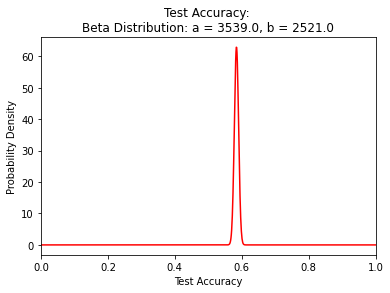

Overall Accuracy: 0.584
User's Accuracy: [0.57 0.57 0.61]
Producer's Accuracy: [0.545 0.562 0.646]
Kappa Coefficient: 0.376098

Time: Random Forest: 14.88878059387207 seconds
Accuracy: 0.641465830307032


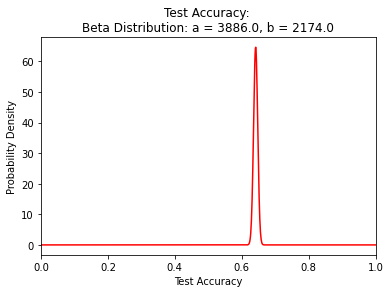

Overall Accuracy: 0.641
User's Accuracy: [0.57  0.688 0.685]
Producer's Accuracy: [0.648 0.589 0.687]
Kappa Coefficient: 0.461775

Time: Logistic Regression: Pre-Covid: 105.64908456802368 seconds
Accuracy: 0.6743524952621605


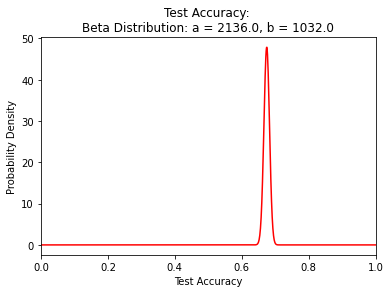

Overall Accuracy: 0.674
User's Accuracy: [0.653 0.759 0.61 ]
Producer's Accuracy: [0.523 0.794 0.701]
Kappa Coefficient: 0.511194

Time: Random Forest: Pre-Covid: 10.17492389678955 seconds
Accuracy: 0.7059380922299432


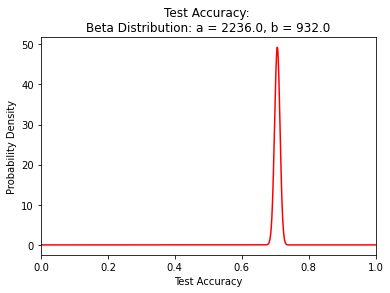

Overall Accuracy: 0.706
User's Accuracy: [0.643 0.855 0.635]
Producer's Accuracy: [0.626 0.777 0.712]
Kappa Coefficient: 0.559045

Time: Logistic Regression: Post-Covid: 79.81158137321472 seconds
Accuracy: 0.5757261410788381


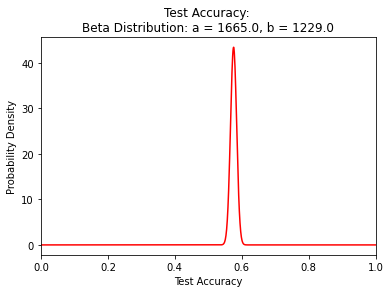

Overall Accuracy: 0.576
User's Accuracy: [0.531 0.582 0.607]
Producer's Accuracy: [0.469 0.619 0.639]
Kappa Coefficient: 0.363652

Time: Random Forest: Post-Covid: 7.143137454986572 seconds
Accuracy: 0.6334716459197787


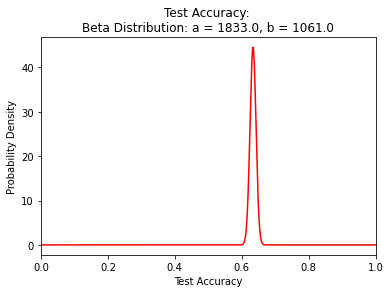

Overall Accuracy: 0.633
User's Accuracy: [0.583 0.614 0.709]
Producer's Accuracy: [0.623 0.586 0.692]
Kappa Coefficient: 0.450171

Overall Accuracy: 0.453
User's Accuracy: [0.687 0.826 0.386]
Producer's Accuracy: [0.196 0.214 0.955]
Kappa Coefficient: 0.181665

Overall Accuracy: 0.435
User's Accuracy: [0.488 0.778 0.37 ]
Producer's Accuracy: [0.634 0.074 0.592]
Kappa Coefficient: 0.151173

Overall Accuracy: 0.428
User's Accuracy: [0.367 0.75  0.932]
Producer's Accuracy: [0.947 0.305 0.039]
Kappa Coefficient: 0.146048

Overall Accuracy: 0.664
User's Accuracy: [0.777 0.758 0.558]
Producer's Accuracy: [0.376 0.789 0.82 ]
Kappa Coefficient: 0.495339

Overall Accuracy: 0.529
User's Accuracy: [0.616 0.554 0.494]
Producer's Accuracy: [0.154 0.676 0.759]
Kappa Coefficient: 0.293782

Overall Accuracy: 0.547
User's Accuracy: [0.521 0.698 0.518]
Producer's Accuracy: [0.565 0.321 0.757]
Kappa Coefficient: 0.32054

Overall Accuracy: 0.528
User's Accuracy: [0.537 0.48  0.607]
Producer's Accuracy: [0

In [92]:
%run mainSVC.py 0 1 0 #0: don't plot anything other than confusion matrix
                      # 1 Resample data 
                      # 0: do not calculate mutual info 

In [39]:
'''
Support Vector Machines
'''
# one versus all support vector classifier
from sklearn.svm import SVC

## One vs All SVC multi-class classifier
def svcOnevsAll(XTrain,YTrain,XTest,YTest):
    YTrain_dummies = pd.get_dummies(YTrain)
    binaryClassifiers = []
    for c,label in enumerate(YTrain_dummies.columns):
        clf = SVC(probability=True).fit(XTrain,YTrain_dummies[YTrain_dummies.columns[c]])
        binaryClassifiers.append(clf)

    predictions = []
    for clf in binaryClassifiers:
        predictions.append(clf.predict_proba(XTest))
    predProb = np.array(predictions).T

    classification = []
    for pred in predProb[1]:
        classification.append(YTrain_dummies.columns[np.where(pred==max(pred))[0][0]])
    classification = np.array(classification).reshape(-1)

    cMatrix = confusionMatrix(classificationTest = classification,
                              Ytest = pd.Series(YTest))
    overallAccuracy, userAccuracy, producerAccuracy, kappaCoeff = metrics(cMatrix)
    print('Overall Accuracy: {}'.format(np.round(overallAccuracy,3)))
    print("User's Accuracy: {}".format(np.round(userAccuracy,3)))
    print("Producer's Accuracy: {}".format(np.round(producerAccuracy,3)))
    print('Kappa Coefficient: {}\n'.format(np.round(kappaCoeff,6)))

    return binaryClassifiers, classification, cMatrix, metrics(cMatrix)

randomNumbers = np.random.permutation(len(XTrain))[0:10000]
XTrainSVM = XTrain[randomNumbers]
YTrainSVM = YTrain[randomNumbers]
binaryClassifiers, classification, cMatrix, metrics_cMatrix = svcOnevsAll(XTrainSVM,YTrainSVM,XTest,YTest)

Overall Accuracy: 0.545
User's Accuracy: [0.495 0.558 0.622]
Producer's Accuracy: [0.669 0.554 0.418]
Kappa Coefficient: 0.319082



(<Figure size 432x360 with 2 Axes>,
 [<AxesSubplot:title={'center':'Support Vector Machine: One vs All'}, xlabel='Severity Class (Predicted)', ylabel='Severity Class (Actual)'>])

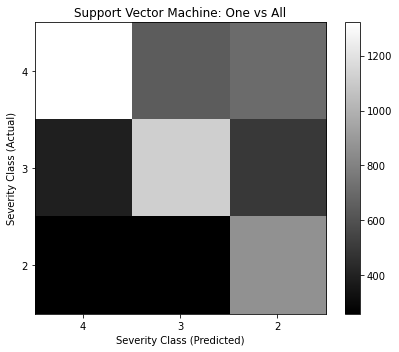

In [57]:
cMatrixPlots([cMatrix],YTest,['Support Vector Machine: One vs All'])

In [98]:
#one versusu one svc
randomNumbers = np.random.permutation(len(XTrain))[0:10000]
XTrainSVM = XTrain[randomNumbers]
YTrainSVM = YTrain[randomNumbers]

YTrain_dummies = pd.get_dummies(YTrainSVM)
YTest_dummies = pd.get_dummies(YTest)
binaryClassifiers = np.empty((len(YTrain_dummies.columns),len(YTrain_dummies.columns)), dtype='object')
for c1,label1 in enumerate(YTrain_dummies.columns):
    for c2,label2 in enumerate(YTrain_dummies.columns):
        if c1<c2:
            y1 = YTrain_dummies[YTrain_dummies.columns[c1]]
            y2 = YTrain_dummies[YTrain_dummies.columns[c2]]
            y = y1.iloc[ list(np.where( ((y1==1).astype(int) + (y2==1).astype(int))==1 )[0]) ]
            x = XTrainSVM[list(y.index.astype(int))]
            clf = SVC(probability=False).fit(x,y)
            binaryClassifiers[c1][c2] = clf

## Predicitons from each model
pred = pd.DataFrame(np.zeros(len(YTest_dummies)))
for c1,label1 in enumerate(YTrain_dummies.columns):
    for c2,label2 in enumerate(YTrain_dummies.columns):
        if c1<c2:
            col = '{}_{}'.format(label1,label2)
            pred[col] = binaryClassifiers[c1][c2].predict(XTest)
pred = pred.drop(pred.columns[0],axis=1)

## Assign labels to every model's prediction
predLabels = pred.copy()
for c1,label1 in enumerate(YTrain_dummies.columns):
    for c2,label2 in enumerate(YTrain_dummies.columns):
        if c1<c2:
            col = '{}_{}'.format(label1,label2)
            vector = pred[col]
            vector[vector==1] = label1
            vector[vector==0] = label2
            predLabels[col] = vector

# Voting for classification
classification = pd.DataFrame(np.zeros(len(predLabels)),columns=['CLS'])
from scipy.stats import mode
for i in range(len(predLabels)):
    classification.iloc[i] = ( mode(predLabels.iloc[i])[0].reshape(-1) )[0]
    
print('Test accuracy: {}'.format(np.mean(classification['CLS'] == YTest) ))




Test accuracy: 0.543083525916144


In [104]:
cMatrix = confusionMatrix(classificationTest = classification,
                              Ytest = pd.Series(YTest))
overallAccuracy, userAccuracy, producerAccuracy, kappaCoeff = metrics(cMatrix)
print('Overall Accuracy: {}'.format(np.round(overallAccuracy,3)))
print("User's Accuracy: {}".format(np.round(userAccuracy,3)))
print("Producer's Accuracy: {}".format(np.round(producerAccuracy,3)))
print('Kappa Coefficient: {}\n'.format(np.round(kappaCoeff,6)))



Overall Accuracy: 0.543
User's Accuracy: [0.571 0.49  0.589]
Producer's Accuracy: [0.46  0.614 0.558]
Kappa Coefficient: 0.315246



(<Figure size 432x360 with 2 Axes>,
 [<AxesSubplot:title={'center':'Support Vector Machine: One vs One'}, xlabel='Severity Class (Predicted)', ylabel='Severity Class (Actual)'>])

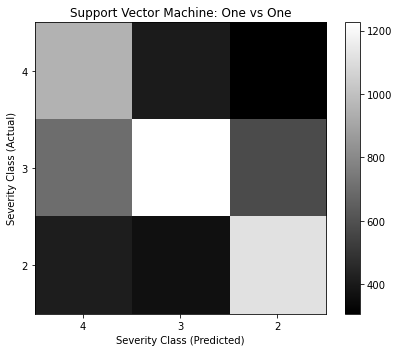

In [105]:
cMatrixPlots([cMatrix],YTest,['Support Vector Machine: One vs One'])